In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad

In [3]:
with open("GSE70630_OG_processed_data_v2.txt" , 'r') as file:
    data = file.read().split()
    data.insert(0, "cell_id")
    columns = [data[i:i+4348] for i in range(0, len(data), 4348)]
    df = pd.DataFrame({col[0]: col[1:] for col in columns[1:]})
df

,'A1BG','A1BG-AS1','A1CF','A2M','A2M-AS1','A2ML1','A2MP1','A4GALT','A4GNT','AA06',...,'ZWILCH','ZWINT','ZXDA','ZXDB','ZXDC','ZYG11A','ZYG11B','ZYX','ZZEF1','ZZZ3'
0,0,0,0,5.7056,0,0,0,0,0,0,...,0,0,0,0,0.53506,0.35163,0,1.3618,1.5998,0
1,0,0,0,4.437,0,0,0,0,0,0,...,0,0,0,0,0.14535,0,2.2185,3.2621,0,0
2,0,0,0,8.0276,4.5347,0.32077,0,0,0,0,...,0,0,0,0,2.7774,0.70752,0.84398,0,0,0
3,0,0,0,5.6288,0,0,0,0,0,0,...,0,0,0,0,1.117,0,1.2259,0,0.26903,0
4,0,0,0.02148,0,0,0,0,0,0,0,...,0,0,0,0,0.12168,0.22157,0.14405,4.9809,0.035624,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,0,0,0,0,0,0.21785,0,0,0,0,...,0,0,0,0,3.8166,0,0.27262,0,0.97893,3.5153
4343,0,0,0,0,0,0.42223,0,0,0,0,...,0,0,0,0,0.17632,0.20163,4.065,0,0,0
4344,0,0,0,0,0,0,0,0,0,0,...,0,0,2.147,0,0.14666,0.27023,0.049631,1.3482,1.7411,0
4345,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72509,0,0.42223,3.459,1.2904,0


In [5]:
df = df.astype(float)
df.sum(axis=1)

0       10189.232905
1        9190.277016
2        9429.238313
3       10836.440011
4       11469.762516
            ...     
4342    14898.295830
4343    14566.050379
4344    14788.470009
4345    14852.825948
4346    13417.604041
Length: 4347, dtype: float64

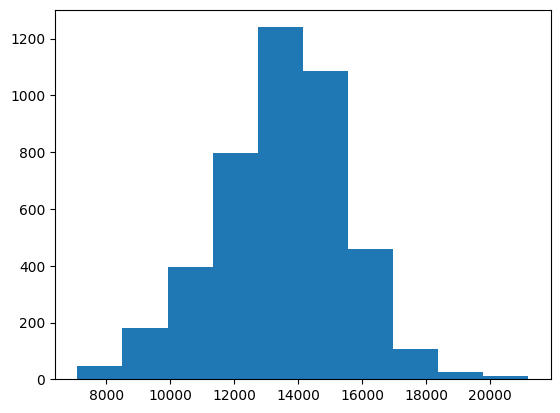

In [18]:
import matplotlib.pyplot as plt
plt.hist(df.sum(axis=1))
plt.show()

In [19]:
df.index = columns[0][1:]
df
adata = ad.AnnData(X = df.values,
                        var = pd.DataFrame(index = df.columns),
                        obs = pd.DataFrame(index = columns[0][1:]))
adata

AnnData object with n_obs × n_vars = 4347 × 23686

In [20]:
adata.write_h5ad("GSE70630_processed.h5ad")
adata

AnnData object with n_obs × n_vars = 4347 × 23686